In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./train.csv') 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
print('\n ### train 데이터 정보 ### \n')
print(df.info())




 ### train 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [42]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Embarked'].fillna('N', inplace=True)
df['Cabin'].fillna('N', inplace=True)

print('데이터 세트 null값 갯수:', df.isnull().sum().sum())




데이터 세트 null값 갯수: 0


In [43]:
print('Sex 값 분포:', df['Sex'].value_counts())
print('\n Cabin 값 분포', df['Cabin'].value_counts())
print('\n Embarked 값 분포', df['Embarked'].value_counts())




Sex 값 분포: male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 N              687
C23 C25 C27      4
G6               4
B96 B98          4
E101             3
              ... 
E63              1
B38              1
E77              1
B82 B84          1
E50              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [44]:
df['Cabin'] =  df['Cabin'].str[:1]
print(df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [45]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

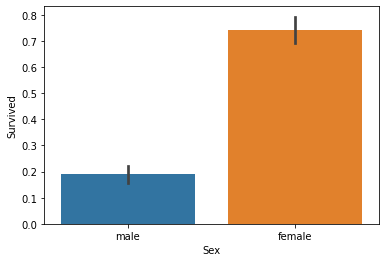

In [46]:
sns.barplot(x='Sex', y='Survived', data = df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

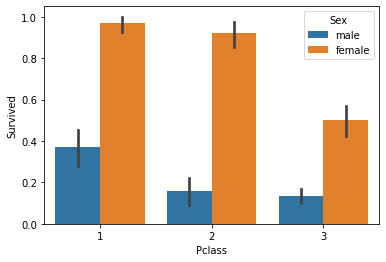

In [47]:
sns.barplot(x = 'Pclass', y='Survived', hue = 'Sex', data = df)


In [37]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat ='Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat 

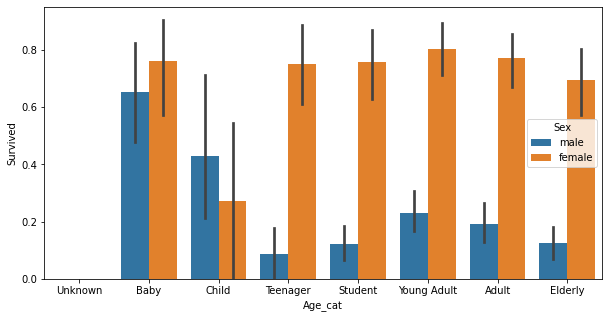

In [38]:
plt.figure(figsize = (10, 5))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student',
              'Young Adult', 'Adult', 'Elderly']

df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue = 'Sex', data = df,
           order = group_names)
df.drop('Age_cat', axis = 1, inplace = True)

In [39]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
        return dataDF

df = encode_features(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,147,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,81,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,147,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,55,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,147,S


In [1]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Embarked'].fillna('N', inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace = True)
    return df


def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Embarked', 'Sex']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_feature(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df
    

In [41]:
df = pd.read_csv('./train.csv')
y_df = df['Survived']
x_df = df.drop('Survived', axis = 1)

x_df = transform_feature(x_df)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df,y_df,
                                                   test_size = 0.2, random_state=11)


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model1 = DecisionTreeClassifier(random_state=11)
model2 = RandomForestClassifier(random_state=11)
model3 = LogisticRegression()

model1.fit(X_train, y_train)
model1_predict = model1.predict(X_test)
print('model1 정확도:{0:.4f}'.format(accuracy_score(y_test, model1_predict)))

model2.fit(X_train, y_train)
model2_predict = model2.predict(X_test)
print('model2 정확도:{0:.4f}'.format(accuracy_score(y_test, model2_predict)))

model3.fit(X_train, y_train)
model3_predict = model3.predict(X_test)
print('model3 정확도:{0:.4f}'.format(accuracy_score(y_test, model3_predict)))


model1 정확도:0.7877
model2 정확도:0.8547
model3 정확도:0.8492


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.model_selection import KFold
import numpy as np

def exec_kfold(clf, folds = 5):
    kfold = KFold(n_splits = folds)
    scores=[]
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_df)):
        X_train, X_test = x_df.values[train_index], x_df.values[test_index]
        y_train, y_test = y_df.values[train_index], y_df.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증{0} 정확도:{1:.4f}'.format(iter_count, accuracy))
    mean_scores = np.mean(scores)
    print('평균 정확도 : {0:.4f}'.format(mean_scores))

exec_kfold(model1, folds = 5)

교차 검증0 정확도:0.7542
교차 검증1 정확도:0.7809
교차 검증2 정확도:0.7865
교차 검증3 정확도:0.7697
교차 검증4 정확도:0.8202
평균 정확도 : 0.7823


In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model1, x_df, y_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print('교차검증{0}정확도:{1:.4f}'.format(iter_count, accuracy))
    
    
print('평균 정확도 ;{0:.4f}'.format(np.mean(scores)))



교차검증0정확도:0.7430
교차검증1정확도:0.7753
교차검증2정확도:0.7921
교차검증3정확도:0.7865
교차검증4정확도:0.8427
평균 정확도 ;0.7879


In [53]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[3, 5, 10],
             'min_samples_split':[2,3,5], 'min_samples_lead':[1,5,8]}

grid_dclf = GridSearchCV(model2, param_grid = parameters, scoring='accuracy',cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 {0:.4f}'.foramt(grid_dclf.best_score_))

best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accruacy = accuracy_score(y_test, drpredictions)
print('테스트 세트에서의 DeecisionTreeClassifier 정확도 :{0:.4f}'.format(accuracy))

ValueError: Invalid parameter min_samples_lead for estimator RandomForestClassifier(max_depth=3, random_state=11). Check the list of available parameters with `estimator.get_params().keys()`.